In [ ]:
import sys
sys.path.append('..')
import importlib
import KoopmanDL as kdl
import torch
import matplotlib.pyplot as plt

alpha = 1.0
beta = -1.0
delta = 0.5
dt = 1e-3
n_init = 1000
traj_len = 50
traj_t_step = 0.25
x_min = -2
x_max = 2
seed = 0

duffing = kdl.DuffingOscillator(alpha, beta, delta)
flowmap = kdl.ForwardEuler(dt)
data_x = flowmap.generate_traj_data(duffing, n_init, traj_len, traj_t_step, x_min, x_max, seed)
data_y = flowmap.generate_next_data(duffing, data_x, traj_t_step)
dataset = kdl.DataSet(data_x, data_y)

In [5]:
rbf_M = 100
rbf_regularizer = 1e-4
traj_len = 50

rbf_basis_func = kdl.RBFDictionary(rbf_M, rbf_regularizer)
rbf_basis_func.build(data_x)
rbf_solver = kdl.EDMDSolver(rbf_basis_func)
K = rbf_solver.compute_K(data_x, data_y)
rbf_solver.compute_eig(K)

In [6]:

n_init = 1
traj_len = 50
seed = 109
traj_t_step = 0.25
x_min = -2
x_max = 2

data_x_test = flowmap.generate_traj_data(duffing, n_init, traj_len, traj_t_step, x_min, x_max, seed)
data_y_test = flowmap.generate_next_data(duffing, data_x_test, traj_t_step)
x_traj = data_x_test

x0_test = data_x_test[0].unsqueeze(0)
x_est_traj_rbf = rbf_solver.predict(x0_test, traj_len)

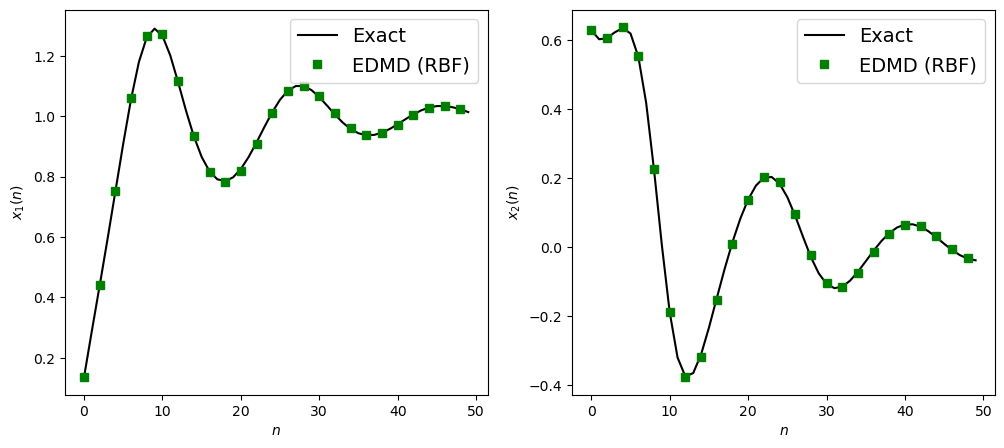

In [9]:
import numpy as np
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(12,5))  

# Plot
t_grid = np.arange(0,traj_len)
ax1.plot(t_grid, x_traj[:,0], 'k-', label='Exact', markevery=2)
ax1.plot(t_grid, x_est_traj_rbf[:,0], 'gs', label='EDMD (RBF)', markevery=2)
    
ax2.plot(t_grid, x_traj[:,1], 'k-', label='Exact', markevery=2)
ax2.plot(t_grid, x_est_traj_rbf[:,1], 'gs', label='EDMD (RBF)', markevery=2)

ax1.set_xlabel(r"$n$")
ax1.set_ylabel(r"$x_{1}(n)$")
ax1.legend(loc='best',prop={'size':14})

ax2.set_xlabel(r"$n$")
ax2.set_ylabel(r"$x_{2}(n)$")
ax2.legend(loc='best',prop={'size':14})